# 朴素贝叶斯分类器

In [78]:
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import numpy as np
import torchvision
import torch
from torchvision import transforms

In [79]:
batch_size = 32

In [80]:
train_data = torchvision.datasets.MNIST("data", train=True, download=True, transform=transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_data = torchvision.datasets.MNIST("data", train=False, download=True, transform=transforms.ToTensor())
val_loader = torch.utils.data.DataLoader(val_data, batch_size=batch_size, shuffle=False)

In [81]:
def pretreatment(data, batch_size):
    image = []
    label = []
    for i in range(len(data)):
        x, y = next(iter(data))
        for ii in range(batch_size):
            image.append(x[ii].reshape(1, -1)[0].tolist())
            label.append(y[ii].item())

    image = np.array(image)
    label = np.array(label)
    return image, label

In [82]:
train_image, train_label = pretreatment(train_loader, batch_size)
val_image, val_label = pretreatment(val_loader, batch_size)

In [83]:
classify = GaussianNB().fit(train_image, train_label)

In [84]:
predict_label = classify.predict(val_image)

预测结果为： 9 2 1 0 9 1 8 9 4 9 
初始标签为： 7 2 1 0 4 1 4 9 5 9 


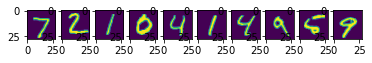

In [99]:
plt.figure(1)
print("预测结果为：",end=" ")
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(val_image[i].flatten().reshape(28, 28))
    print(predict_label[i], end=" ")

print("\n初始标签为：",end=" ")
for i in range(10):
    print(val_label[i],end=" ")
print()

In [97]:
sum=0
for i in range(len(val_loader)):
    if val_label[i] == predict_label[i]:
        sum += 1
print("预测精度为：")
print(sum/len(val_loader))

预测精度为：
0.6549520766773163
